In [16]:
%matplotlib inline
from modsim import *
from tabula import read_pdf
from pandas import read_html
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

table1 = read_html('USASAC2015-Report#27-2014-Activities 8.html')
product_tables = read_html('USASAC2015-Report#27-2014-Activities 10.html')
table2= read_html('USASAC2015-Report#27-2014-Activities 97-11.html')
table3 = read_html('USASAC2015-Report#27-2014-Activities 98-12.html')
return_97 = table2[0]
return_98 = table3[0]

In [17]:
aqua_prdt = product_tables[0]
aqua_prdt.columns = ['year','production']
#aqua_prdt.production[15] = 2381
aqua_prdt.index = aqua_prdt.year
#aqua_prdt

In [18]:
salmon_pop = table1[0]
salmon_pop.columns = ['year','fst', 'second','thrid', 'repeat', 'total','hatchery', 'natural']
salmon_pop.index = salmon_pop.year
#salmon_popu = salmon_pop.hatchery + salmon_pop.natural
pop_total = salmon_pop.natural + salmon_pop.hatchery
salmon_pop.fst

year
1967      75
1968      18
1969      32
1970       9
1971      31
1972      24
1973      18
1974      52
1975      77
1976     172
1977      63
1978     145
1979     225
1980     707
1981     789
1982     294
1983     239
1984     387
1985     302
1986     582
1987     807
1988     755
1989     992
1990     575
1991     255
1992    1056
1993     405
1994     342
1995     168
1996     574
1997     278
1998     340
1999     402
2000     292
2001     269
2002     437
2003     233
2004     319
2005     317
2006     442
2007     299
2008     812
2009     243
2010     552
2011    1084
2012      26
2013      78
2014     110
Name: fst, dtype: int64

In [19]:
production = aqua_prdt.production
return_97.columns = ['year','first', 'second','third', 'repeat', 'total','hatchery', 'natural']
return_97.index = return_97.year
return_97

,year,first,second,third,repeat,total,hatchery,natural
year,,,,,,,,
1997,1997,278,1492,8,36,1814,1296,518
1998,1998,340,1477,3,42,1862,1146,716
1999,1999,402,1136,3,26,1567,959,608
2000,2000,292,535,0,20,847,562,285
2001,2001,269,804,7,4,1084,833,251
2002,2002,437,505,2,23,967,832,135
2003,2003,233,1185,3,6,1427,1238,189
2004,2004,319,1266,21,24,1630,1395,235
2005,2005,317,945,0,10,1272,1019,253


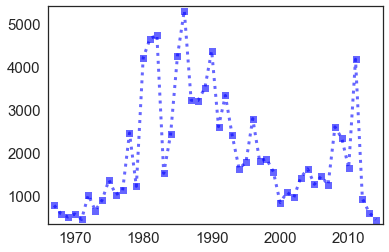

In [20]:
newfig()
plot(salmon_pop.index, salmon_pop.total, 'bs:')


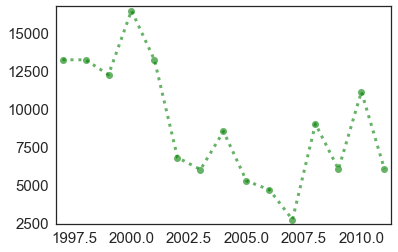

In [21]:
newfig()
plot(aqua_prdt.index, production, 'go:')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


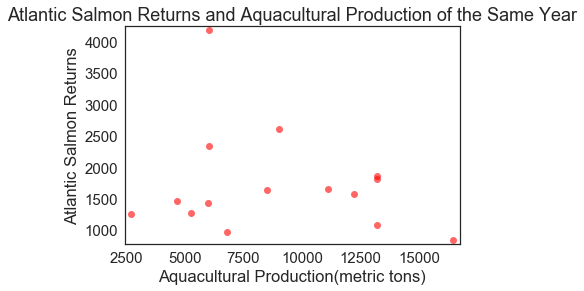

In [22]:
newfig()
plot(production, return_97.total, 'ro')
decorate(xlabel = 'Aquacultural Production(metric tons)',
         ylabel = 'Atlantic Salmon Returns',
         title = 'Atlantic Salmon Returns and Aquacultural Production of the Same Year')

In [23]:
production = aqua_prdt.production
return_98.columns = ['year','1sw', '2sw','3sw', 'repeat', 'total','hatchery', 'natural']
return_98.index = return_97.year
change = return_97.total - return_98.total
production

year
1997    13222
1998    13222
1999    12246
2000    16461
2001    13202
2002     6798
2003     6007
2004     8515
2005     5263
2006     4674
2007     2715
2008     9014
2009     6028
2010    11127
2011     6031
Name: production, dtype: int64

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


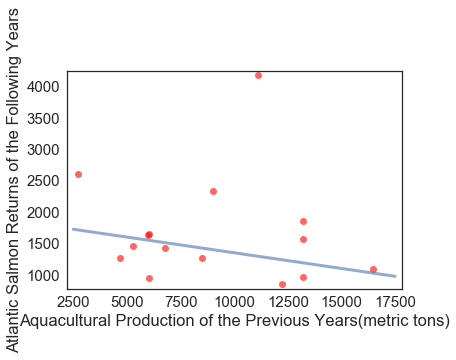

In [24]:
newfig()
plot(production, return_98.total, 'ro')
x = linrange(2500, 17500)
y = 1850 - .05*x
plot(x, y)
decorate(xlabel = 'Aquacultural Production of the Previous Years(metric tons)',
         ylabel = 'Atlantic Salmon Returns of the Following Years')

In [25]:
a = np.random.rand(1, 5)

In [26]:
for i in a:
    print(i*100)

[ 36.7110373   93.20343506  43.64162352  82.9520051   33.94238084]


In [27]:
b = 10000 + np.random.randn(5) * 2500
np.mean(b)

9786.1502036671245

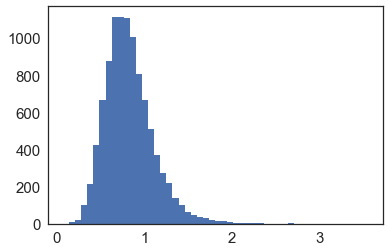

In [28]:
mu, sigma = 10000, 2500
x = mu + sigma*np.random.randn(10000)
x = 10 - log(x)
n, bins, patches = plt.hist(x, bins = 50)
plt.show()
#salmon_pop.first

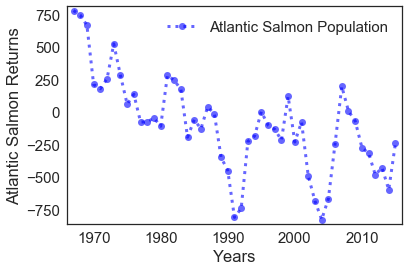

In [43]:
salmon = System(t0 = salmon_pop.index[0],
                t_end = salmon_pop.index[-1],
                p0 = salmon_pop.total[salmon_pop.index[0]],
                fishing = 3000)

def run_simulation1(system):
    system.returns = TimeSeries()
    system.returns[system.t0] = system.p0
    mu, sigma = 300, 200
    for year in linrange(system.t0, system.t_end):
        birth = mu + sigma*np.random.randn(1, 1)
        system.fishing = 2900 + 1000*np.random.randn(1, 1)
        system.returns[year+1] = system.returns[year] + birth - system.fishing/10
    return system.returns

def decoration():
    decorate(title = '',
             xlabel = 'Years',
             ylabel = 'Atlantic Salmon Returns',
             legend = True)
    
results = run_simulation1(salmon)
plot(results, 'bo:', label = 'Atlantic Salmon Population')
decoration()

In [44]:
mu + sigma*np.random.randn(1, 1)

array([[ 10000.32546935]])

In [45]:
def run_simulation2(system):
    system.returns = TimeSeries()
    system.returns[system.t0] = system.p0
    mu1, sigma1, mu2, sigma2 = 300, 200, 290, 100
    system.fishing
    return system.returns

